In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder

In [123]:
df = pd.read_csv("data.csv", index_col = [0])
df = df.dropna()
print ("Number of Samples:", df.shape[0])

Number of Samples: 99366


In [125]:
df['final_score'] = df.groupby('op_permalink')['comment_score'].transform(lambda x: x/x.max())
df.loc[(df['final_score'] < 0.0), 'final_score'] = 0.0
df = df.drop(columns = ['op_permalink', 'comment_permalink'])

In [115]:
df['final_score'].describe()

count    99367.000000
mean         0.038205
std          0.156270
min          0.000000
25%          0.000166
50%          0.001085
75%          0.006515
max          1.000000
Name: final_score, dtype: float64

(array([48249., 10905.,  5312.,  3992.,  2916.,  2099.,  1911.,  1317.,
         1347.,  1009.]),
 array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
        0.009, 0.01 ]),
 <a list of 10 Patch objects>)

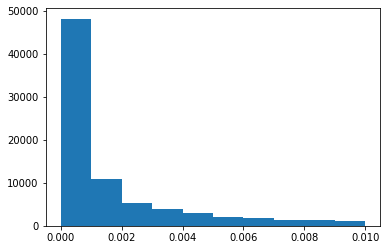

In [116]:
hist = plt.hist(df['final_score'], range = [0.0, 0.01], bins = 10)
hist

In [129]:
#Close to 80% of data < 0.01 score
bins = np.concatenate((np.linspace(0.0, 0.01, num=11), np.linspace(0.01, 1.0, num=11)[1:]))
print ("Bins:", bins)
df['label'] = pd.cut(df['final_score'], bins = bins, include_lowest = True, labels = [i for i in range(bins.shape[0]-1)])

Bins: [0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.109
 0.208 0.307 0.406 0.505 0.604 0.703 0.802 0.901 1.   ]


In [131]:
df = df.drop(columns = ['final_score', 'comment_score'])
print (df.keys())

Index(['op_ah_judgement_ratio', 'op_created', 'op_flair',
       'op_flesch_reading_ease', 'op_age', 'op_gender', 'op_score',
       'op_sentiment', 'op_upvote_ratio', 'comment_created',
       'comment_flesch_reading_ease', 'comment_judgement', 'comment_sentiment',
       'label'],
      dtype='object')


In [132]:
df = pd.get_dummies(df, columns = ['op_flair', 'op_gender', 'comment_judgement'])
print (df.keys())

Index(['op_ah_judgement_ratio', 'op_created', 'op_flesch_reading_ease',
       'op_age', 'op_score', 'op_sentiment', 'op_upvote_ratio',
       'comment_created', 'comment_flesch_reading_ease', 'comment_sentiment',
       'label', 'op_flair_Asshole', 'op_flair_Everyone Sucks',
       'op_flair_No A-holes here', 'op_flair_Not enough info',
       'op_flair_Not the A-hole', 'op_gender_f', 'op_gender_m', 'op_gender_nb',
       'comment_judgement_esh', 'comment_judgement_info',
       'comment_judgement_nah', 'comment_judgement_nta',
       'comment_judgement_yta'],
      dtype='object')


In [133]:
X = df.drop(columns = ['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [135]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.4798732011673543


In [136]:
print (f1_score(y_test, y_pred, average = 'macro'))

0.032426643092720406
